# Exploratory Data Analysis Sports-Indian Premier League

In [ ]:
import pandas as pd
import numpy as np

In [5]:
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.7 -m pip install --upgrade pip' command.


In [7]:
players = pd.read_excel('/home/webtunix/Downloads/archive (3)/Players.xlsx')
players.to_csv('/home/webtunix/Downloads/archive (3)/Players.csv')

In [9]:
match_df = pd.read_csv('/home/webtunix/Downloads/archive (3)/matches.csv')
deliveries_df = pd.read_csv('/home/webtunix/Downloads/archive (3)/deliveries.csv')
ras_df = pd.read_csv('/home/webtunix/Downloads/archive (3)/most_runs_average_strikerate.csv')
players_df = pd.read_csv('/home/webtunix/Downloads/archive (3)/Players.csv')
teams_df = pd.read_csv('/home/webtunix/Downloads/archive (3)/teams.csv')
homeaway_df = pd.read_csv('/home/webtunix/Downloads/archive (3)/teamwise_home_and_away.csv')

# Data Preprocessing


In [10]:
teams_df.drop(teams_df.index[teams_df['team1'] == 'Rising Pune Supergiant'], inplace = True)
teams_df.drop(teams_df.index[teams_df['team1'] == 'Delhi Daredevils'], inplace = True)
teams_df.reset_index(drop=True, inplace=True)

In [11]:
deliveries_df['batting_team'] = deliveries_df['batting_team'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})
deliveries_df['batting_team'] = deliveries_df['batting_team'].replace({'Delhi Daredevils':'Delhi Capitals'})

In [13]:
players_df['Bowling_Skill'] = players_df['Bowling_Skill'].str.replace('Legbreak googly', 'Legbreak')
players_df['Bowling_Skill'] = players_df['Bowling_Skill'].str.replace('Right-arm Fast', 'Right-arm fast')
players_df['Bowling_Skill'] = players_df['Bowling_Skill'].str.replace('Right-arm Medium', 'Right-arm medium')
players_df['Batting_Hand'] = players_df['Batting_Hand'].str.replace('Right_hand', 'Right_Hand')

In [14]:
def bowling_type(df):
    type_list = ['Right-arm medium', 'Right-arm fast-medium', 'Right-arm medium-fast', 'Right-arm fast', 'Left-arm fast-medium',
       'Left-arm medium-fast', 'Left-arm medium', 'Left-arm fast']
    
    if (df['Bowling_Skill'] in type_list):
        val = 'Pace'
        
    else:
        val = 'Spin'
        
    return val

players_df['Bowling_Type'] = players_df.apply(bowling_type, axis = 1)

# Exploratory Analysis and Visualization


In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [38]:
matches = pd.read_csv('/home/webtunix/Downloads/archive (3)/matches.csv')
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [39]:
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [40]:
matches.describe()


,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


<AxesSubplot:>

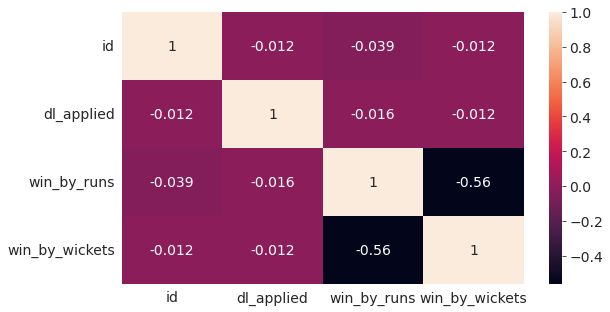

In [41]:
matches.corr()
sns.heatmap(matches.corr(), annot = True)


id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


<AxesSubplot:>

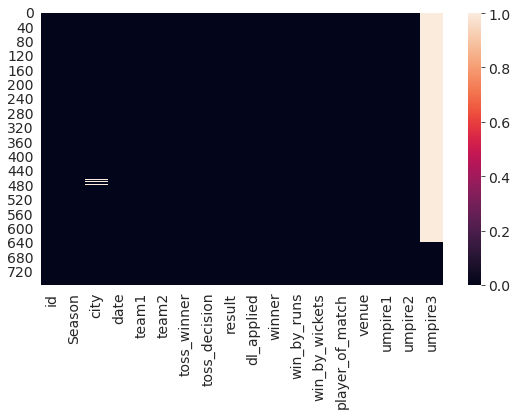

In [42]:
print(matches.isnull().sum())
sns.heatmap(matches.isnull())

In [45]:
deliveries = pd.read_csv('/home/webtunix/Downloads/archive (3)/deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [46]:
deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [47]:
deliveries.isnull().sum()


match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [48]:
df= pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [50]:
df.describe(include = 'all')


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,179078.000000,179078.000000,179078,179078,179078.000000,179078.000000,179078,179078,179078,179078.000000,...,179078,179078.000000,178706,179078.000000,179078.000000,178706,179078,178578,178578,28366
unique,NaN,NaN,15,15,NaN,NaN,516,511,405,NaN,...,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,...,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,NaN,22619,22517,NaN,NaN,4211,4173,3451,NaN,...,176372,NaN,26305,NaN,NaN,4949,17991,17486,13727,2409
mean,1802.252957,1.482952,NaN,NaN,10.162488,3.615587,NaN,NaN,NaN,0.000452,...,NaN,0.017914,NaN,13.404036,3.261579,NaN,NaN,NaN,NaN,NaN
std,3472.322805,0.502074,NaN,NaN,5.677684,1.806966,NaN,NaN,NaN,0.021263,...,NaN,0.132639,NaN,23.261007,3.347033,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,...,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,...,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,...,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,...,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [51]:
df.isnull().sum()


match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
id                       0
Season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
u

In [52]:
df[df.city.isnull()]


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
109377,462,1,Mumbai Indians,Royal Challengers Bangalore,1,1,MEK Hussey,AP Tare,MA Starc,0,...,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
109378,462,1,Mumbai Indians,Royal Challengers Bangalore,1,2,AP Tare,MEK Hussey,MA Starc,0,...,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
109379,462,1,Mumbai Indians,Royal Challengers Bangalore,1,3,MEK Hussey,AP Tare,MA Starc,0,...,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
109380,462,1,Mumbai Indians,Royal Challengers Bangalore,1,4,MEK Hussey,AP Tare,MA Starc,0,...,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
109381,462,1,Mumbai Indians,Royal Challengers Bangalore,1,5,MEK Hussey,AP Tare,MA Starc,0,...,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113170,477,2,Mumbai Indians,Sunrisers Hyderabad,20,2,Z Khan,CM Gautam,IK Pathan,0,...,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN
113171,477,2,Mumbai Indians,Sunrisers Hyderabad,20,3,CM Gautam,Z Khan,IK Pathan,0,...,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN
113172,477,2,Mumbai Indians,Sunrisers Hyderabad,20,4,CM Gautam,Z Khan,IK Pathan,0,...,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN
113173,477,2,Mumbai Indians,Sunrisers Hyderabad,20,5,Z Khan,CM Gautam,IK Pathan,0,...,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [53]:
df[df.winner.isnull()]


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
70930,301,1,Delhi Daredevils,Pune Warriors,1,1,NV Ojha,DA Warner,AC Thomas,0,...,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
70931,301,1,Delhi Daredevils,Pune Warriors,1,2,DA Warner,NV Ojha,AC Thomas,0,...,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
70932,301,1,Delhi Daredevils,Pune Warriors,1,3,NV Ojha,DA Warner,AC Thomas,0,...,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
70933,301,1,Delhi Daredevils,Pune Warriors,1,4,NV Ojha,DA Warner,AC Thomas,0,...,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
70934,301,1,Delhi Daredevils,Pune Warriors,1,5,NV Ojha,DA Warner,AC Thomas,0,...,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176458,11340,2,Rajasthan Royals,Royal Challengers Bangalore,3,4,SV Samson,L Livingstone,K Khejroliya,0,...,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary
176459,11340,2,Rajasthan Royals,Royal Challengers Bangalore,3,5,SV Samson,L Livingstone,K Khejroliya,0,...,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary
176460,11340,2,Rajasthan Royals,Royal Challengers Bangalore,3,6,SV Samson,L Livingstone,K Khejroliya,0,...,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary
176461,11340,2,Rajasthan Royals,Royal Challengers Bangalore,4,1,L Livingstone,SV Samson,YS Chahal,0,...,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [54]:
df.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'Season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [55]:
df['umpire1'].value_counts().sort_values(ascending =False)


HDPK Dharmasena    17486
Asad Rauf          12010
S Ravi             11824
AK Chaudhary       10104
Aleem Dar           9137
                   ...  
Ulhas Gandhe         248
A Nanda Kishore      242
Sundaram Ravi        239
SL Shastri           234
Nanda Kishore        228
Name: umpire1, Length: 61, dtype: int64

In [56]:
df['umpire2'].value_counts().sort_values(ascending =False)


S Ravi                   13727
C Shamshuddin            13371
SJA Taufel               12981
RJ Tucker                 8779
CK Nandan                 8350
                         ...  
Subroto Das                243
KN Ananthapadmanabhan      243
JD Cloete                  243
Nand Kishore               242
SD Fry                     240
Name: umpire2, Length: 65, dtype: int64

In [57]:
df.city.fillna("Dubai", inplace = True) 
df.fillna(0, inplace = True)
df.winner.fillna('Raining', inplace = True)
df.player_of_match.fillna('Raining', inplace = True)
df.umpire1.fillna('HDPK Dharmasena', inplace = True)
df.umpire2.fillna('S Ravi', inplace = True)
df.drop(['umpire3'], axis = 1, inplace = True)

In [62]:
df.isnull().sum()


match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
id                  0
Season              0
city                0
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner              0
win_by_runs         0
win_by_wickets      0
player_of_match     0
venue               0
umpire1             0
umpire2             0
dtype: int64

In [65]:
print(df.Season.unique(),
      "\nTotal number of IPL Season:", df.Season.nunique(),
      "\nTeams:\n", np.unique(df[['team1','team2']].values))

['IPL-2017' 'IPL-2008' 'IPL-2009' 'IPL-2010' 'IPL-2011' 'IPL-2012'
 'IPL-2013' 'IPL-2014' 'IPL-2015' 'IPL-2016' 'IPL-2018' 'IPL-2019'] 
Total number of IPL Season: 12 
Teams:
 ['Chennai Super Kings' 'Deccan Chargers' 'Delhi Capitals'
 'Delhi Daredevils' 'Gujarat Lions' 'Kings XI Punjab'
 'Kochi Tuskers Kerala' 'Kolkata Knight Riders' 'Mumbai Indians'
 'Pune Warriors' 'Rajasthan Royals' 'Rising Pune Supergiant'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']


In [66]:
def annot_plot(ax,w,h): # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}' ,(p.get_x() +w, p.get_height()+h))

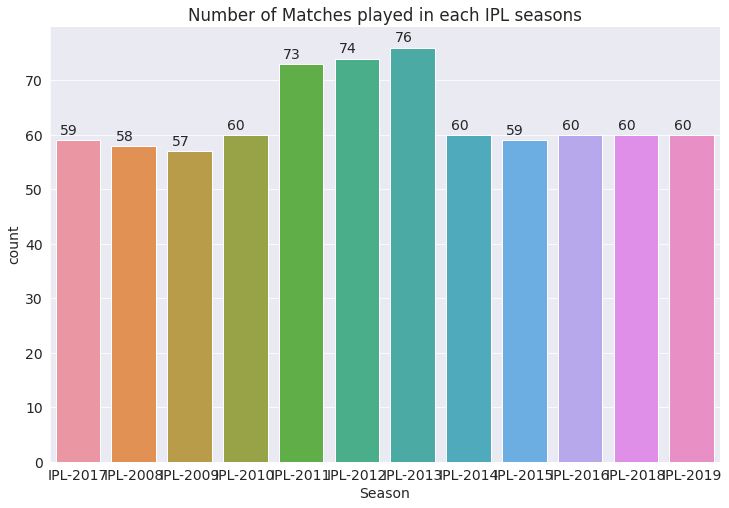

In [68]:
plt.figure(figsize=(12,8))
plt.title('Number of Matches played in each IPL seasons')
ax=sns.countplot(x=matches.Season)
annot_plot(ax,0.08,1)
plt.show()

In [69]:
df.venue.value_counts()


Eden Gardens                                            17991
Wankhede Stadium                                        17590
M Chinnaswamy Stadium                                   16872
Feroz Shah Kotla                                        15604
Rajiv Gandhi International Stadium, Uppal               13303
MA Chidambaram Stadium, Chepauk                         12006
Sawai Mansingh Stadium                                  11158
Punjab Cricket Association Stadium, Mohali               8266
Maharashtra Cricket Association Stadium                  5055
Subrata Roy Sahara Stadium                               4064
Dr DY Patil Sports Academy                               3993
Kingsmead                                                3643
Punjab Cricket Association IS Bindra Stadium, Mohali     3315
Sardar Patel Stadium, Motera                             2893
SuperSport Park                                          2866
Brabourne Stadium                                        2719
Dr. Y.S.

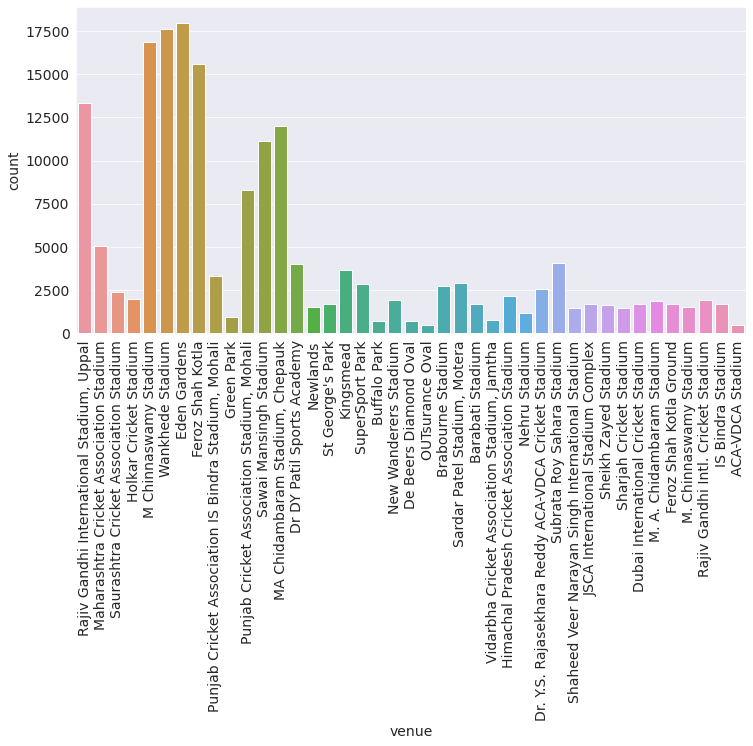

In [70]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=df)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

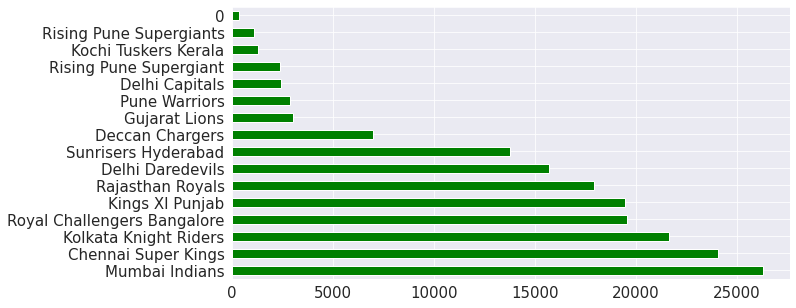

In [72]:
df['winner'].value_counts().sort_values(ascending =False).plot(kind = 'barh', figsize=(10,5), fontsize=15, color='green')


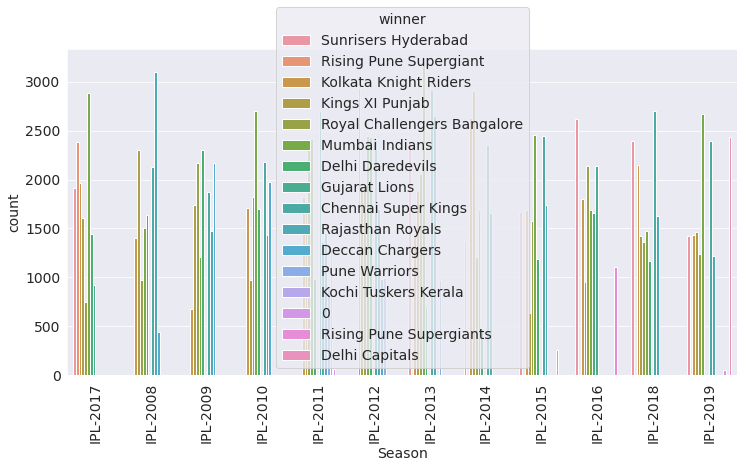

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(x='Season', hue='winner', data=df)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

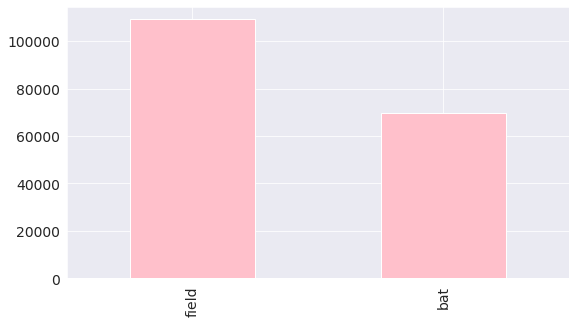

In [74]:
toss_dec = df.toss_decision.value_counts().plot(kind = 'bar', color='pink')
toss_dec

Text(0, 0.5, 'Frequency')

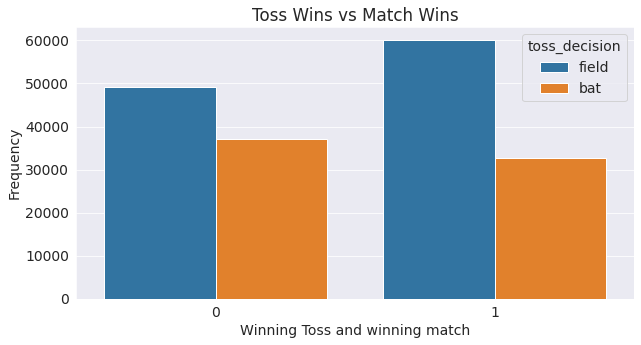

In [75]:
df['team_toss_win'] = np.where((df.toss_winner == df.winner), 1,0)
plt.figure(figsize=(10, 5))
sns.countplot('team_toss_win', data = df, hue = 'toss_decision')
plt.title("Toss Wins vs Match Wins")
plt.xlabel("Winning Toss and winning match")
plt.ylabel("Frequency")

<AxesSubplot:>

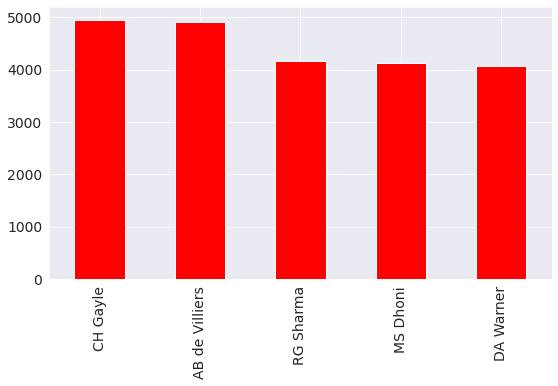

In [76]:
player_of_match=df['player_of_match'].value_counts().head(5).plot(kind = 'bar', color = 'r')
player_of_match

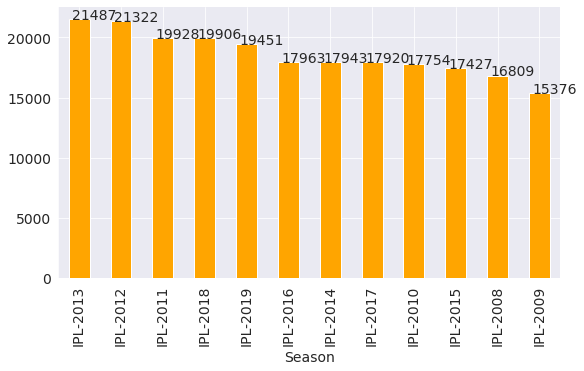

In [77]:
ax= df.groupby('Season')['batsman_runs'].sum().sort_values(ascending= False).plot(kind = 'bar', color = "orange")
annot_plot(ax,0.08,1)
plt.show()

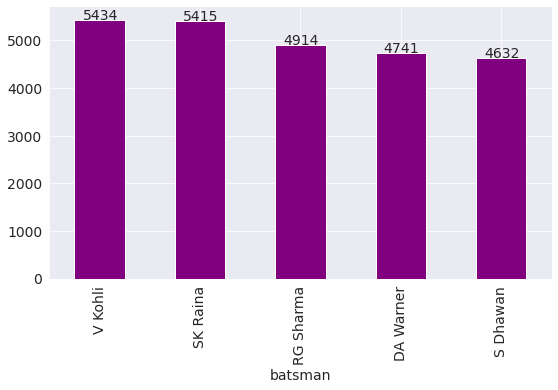

In [78]:
ax= df.groupby('batsman')['batsman_runs'].agg("sum").sort_values(ascending= False).head(5).plot(kind = 'bar', color = "purple")
annot_plot(ax,0.08,1)
plt.show()

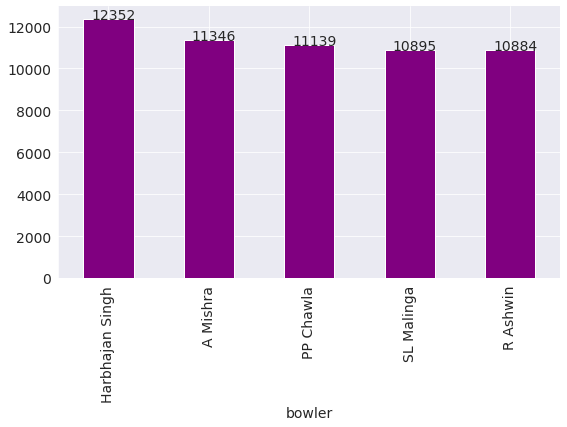

In [79]:
ax= df.groupby('bowler')['ball'].agg("sum").sort_values(ascending= False).head(5).plot(kind = 'bar', color = "purple")
annot_plot(ax,0.08,1)
plt.show()

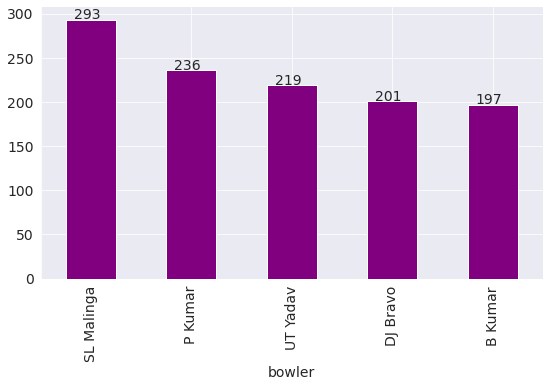

In [80]:
ax= df.groupby('bowler')['extra_runs'].agg("sum").sort_values(ascending= False).head(5).plot(kind = 'bar', color = "purple")
annot_plot(ax,0.08,1)
plt.show()

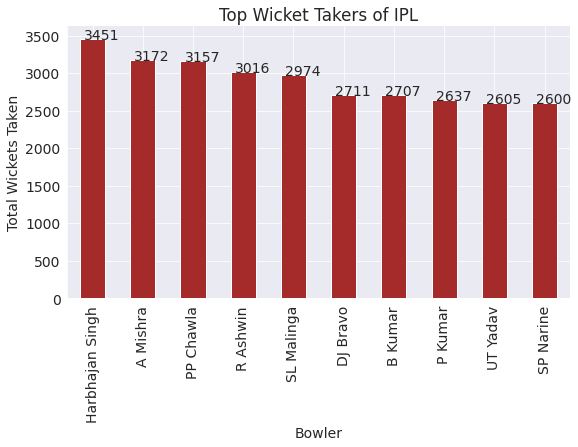

In [81]:
ax= df.groupby('bowler')['player_dismissed'].count().sort_values(ascending= False).head(10).plot(kind = 'bar', color = 'brown')
annot_plot(ax,0.08,1)
plt.title("Top Wicket Takers of IPL")
plt.xlabel("Bowler")
plt.ylabel("Total Wickets Taken")
plt.show()